<a href="https://colab.research.google.com/github/VA0211/yolo_capstone/blob/main/YOLO_Capstone_Try_FastC3Ghost.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!nvidia-smi

Thu Jun 13 12:36:13 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   46C    P8               9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [2]:
# create a HOME constant to manage data and models
import os
HOME = os.getcwd()
print(HOME)

/content


## Clone YOLO repo

In [4]:
!git clone https://github.com/VA0211/yolo_capstone.git  # clone
%cd {HOME}/yolo_capstone
%pip install -qr requirements.txt comet_ml  # install

import torch
import utils
display = utils.notebook_init()  # checks

YOLOv5 🚀 c968ad0 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)


Setup complete ✅ (2 CPUs, 12.7 GB RAM, 30.3/78.2 GB disk)


In [5]:
#@title Select YOLOv5 🚀 logger {run: 'auto'}
logger = 'Comet' #@param ['Comet', 'ClearML', 'TensorBoard']
#seQCHJEdsfXjnlAU9lrtAsJkY
if logger == 'Comet':
  %pip install -q comet_ml
  import comet_ml; comet_ml.init()
elif logger == 'ClearML':
  %pip install -q clearml
  import clearml; clearml.browser_login()
elif logger == 'TensorBoard':
  %load_ext tensorboard
  %tensorboard --logdir runs/train

Please paste your Comet API key from https://www.comet.com/api/my/settings/
(api key may not show as you type)
Comet API key: ··········


COMET INFO: Valid Comet API Key saved in /root/.comet.config (set COMET_CONFIG to change where it is saved).


In [6]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="ns25Pg9EOaUZQcTM2Rwt")
project = rf.workspace("tcnsdisncpcsa").project("demo_count_items")
version = project.version(3)
dataset = version.download("yolov9")

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 3.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 158.3/158.3 kB 12.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 178.7/178.7 kB 27.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 9.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.1/49.1 MB 14.0 MB/s eta 0:00:00
Reason for being yanked: deprecated, use 4.8.0.76
  Attempting uninstall: opencv-python-headless
    Found existing installation: opencv-python-headless 4.10.0.82
    Uninstalling opencv-python-headless-4.10.0.82:
      Successfully uninstalled opencv-python-headless-4.10.0.82
  Attempting uninstall: idna
    Found existing installation: idna 3.7
    Uninstalling idna-3.7:
      Successfully uninstalled idna-3.7
  Attempting uninstall: cycler
    Found existing installation: cycler 0.12.1
    Uninstalling cycler-0.12.1:
      Successfully uninstalled cycler-0.12.1
  Attempting uninstall

loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to demo_count_items-3 in yolov9:: 100%|██████████| 548/548 [00:00<00:00, 1484.50it/s]


In [15]:
!python train.py \
 --img 640 --batch 16 --epochs 100 \
 --data {dataset.location}/data.yaml --weights {result_path}weights/best.pt --cfg "/content/yolo_capstone/models/yolov5-FasrNetG.yaml"

2024-06-13 13:33:05.963274: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-06-13 13:33:05.963320: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-06-13 13:33:05.965119: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
train: weights=/content/yolo_capstone/runs/train/exp2/weights/best.pt, cfg=/content/yolo_capstone/models/yolov5-FasrNetG.yaml, data=/content/yolo_capstone/demo_count_items-3/data.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=100, batch_size=16, imgsz=640, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, evolv

## Examine Training Results

**NOTE:** By default, the results of each subsequent training sessions are saved in `{HOME}/yolov9/runs/train/`, in directories named `exp`, `exp2`, `exp3`, ... You can override this behavior by using the `--name` parameter.

In [8]:
!ls {HOME}/yolo_capstone/runs/train/exp/

confusion_matrix.png				    P_curve.png       train_batch2.jpg
events.out.tfevents.1718282533.3337822d27a1.2009.0  PR_curve.png      val_batch0_labels.jpg
F1_curve.png					    R_curve.png       val_batch0_pred.jpg
hyp.yaml					    results.csv       val_batch1_labels.jpg
labels_correlogram.jpg				    results.png       val_batch1_pred.jpg
labels.jpg					    train_batch0.jpg  weights
opt.yaml					    train_batch1.jpg


## 100 epoch

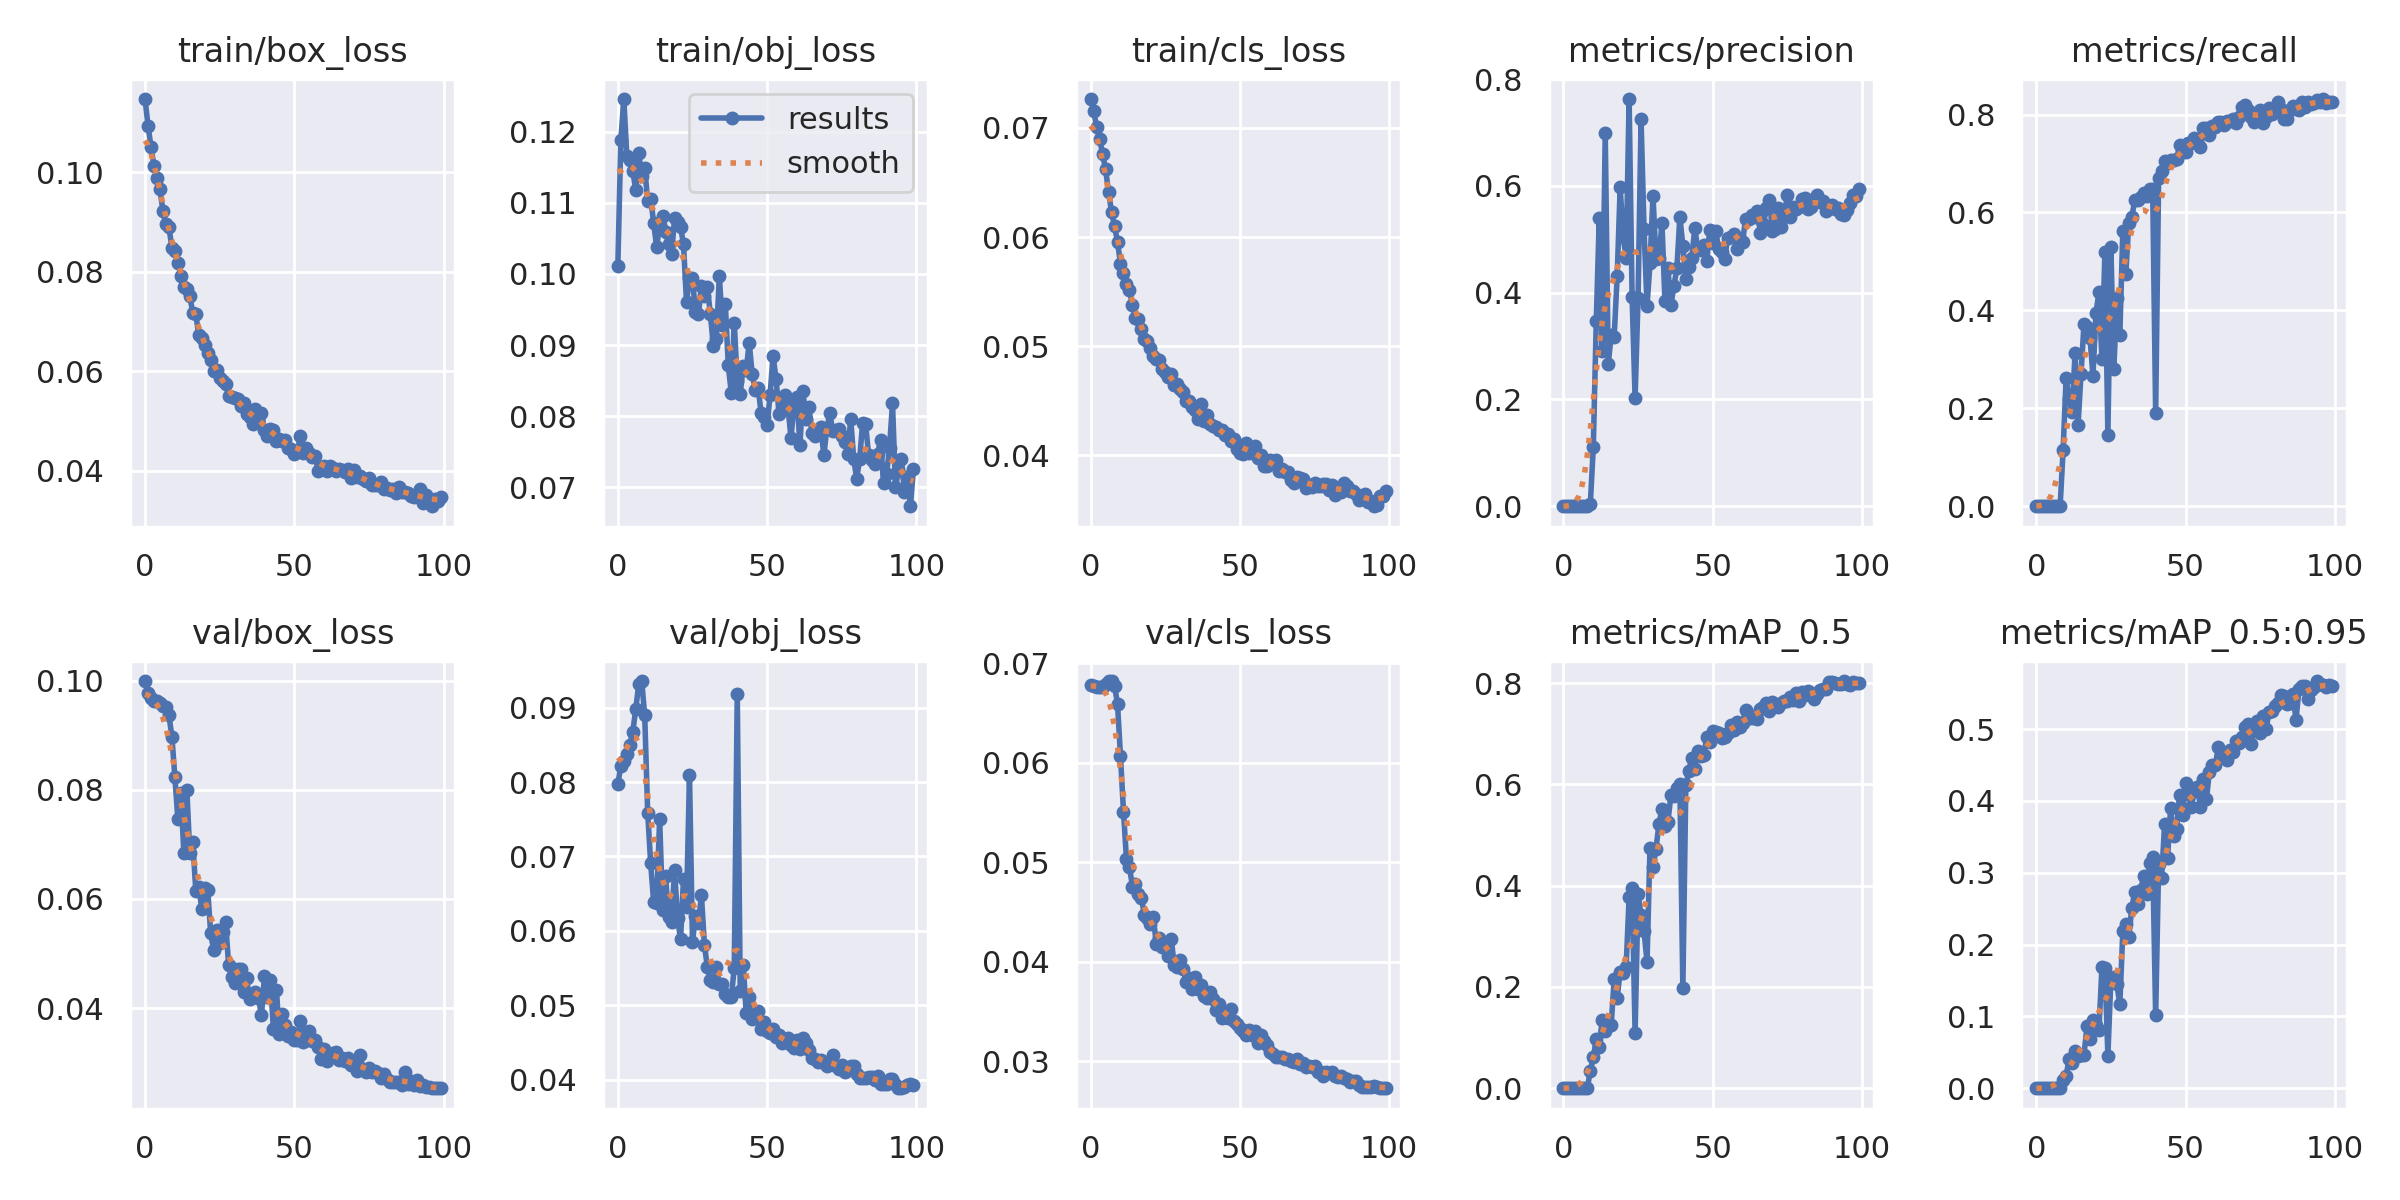

In [9]:
from IPython.display import Image
result_path = f'{HOME}/yolo_capstone/runs/train/exp/'
Image(filename=f"{result_path}results.png", width=1000)

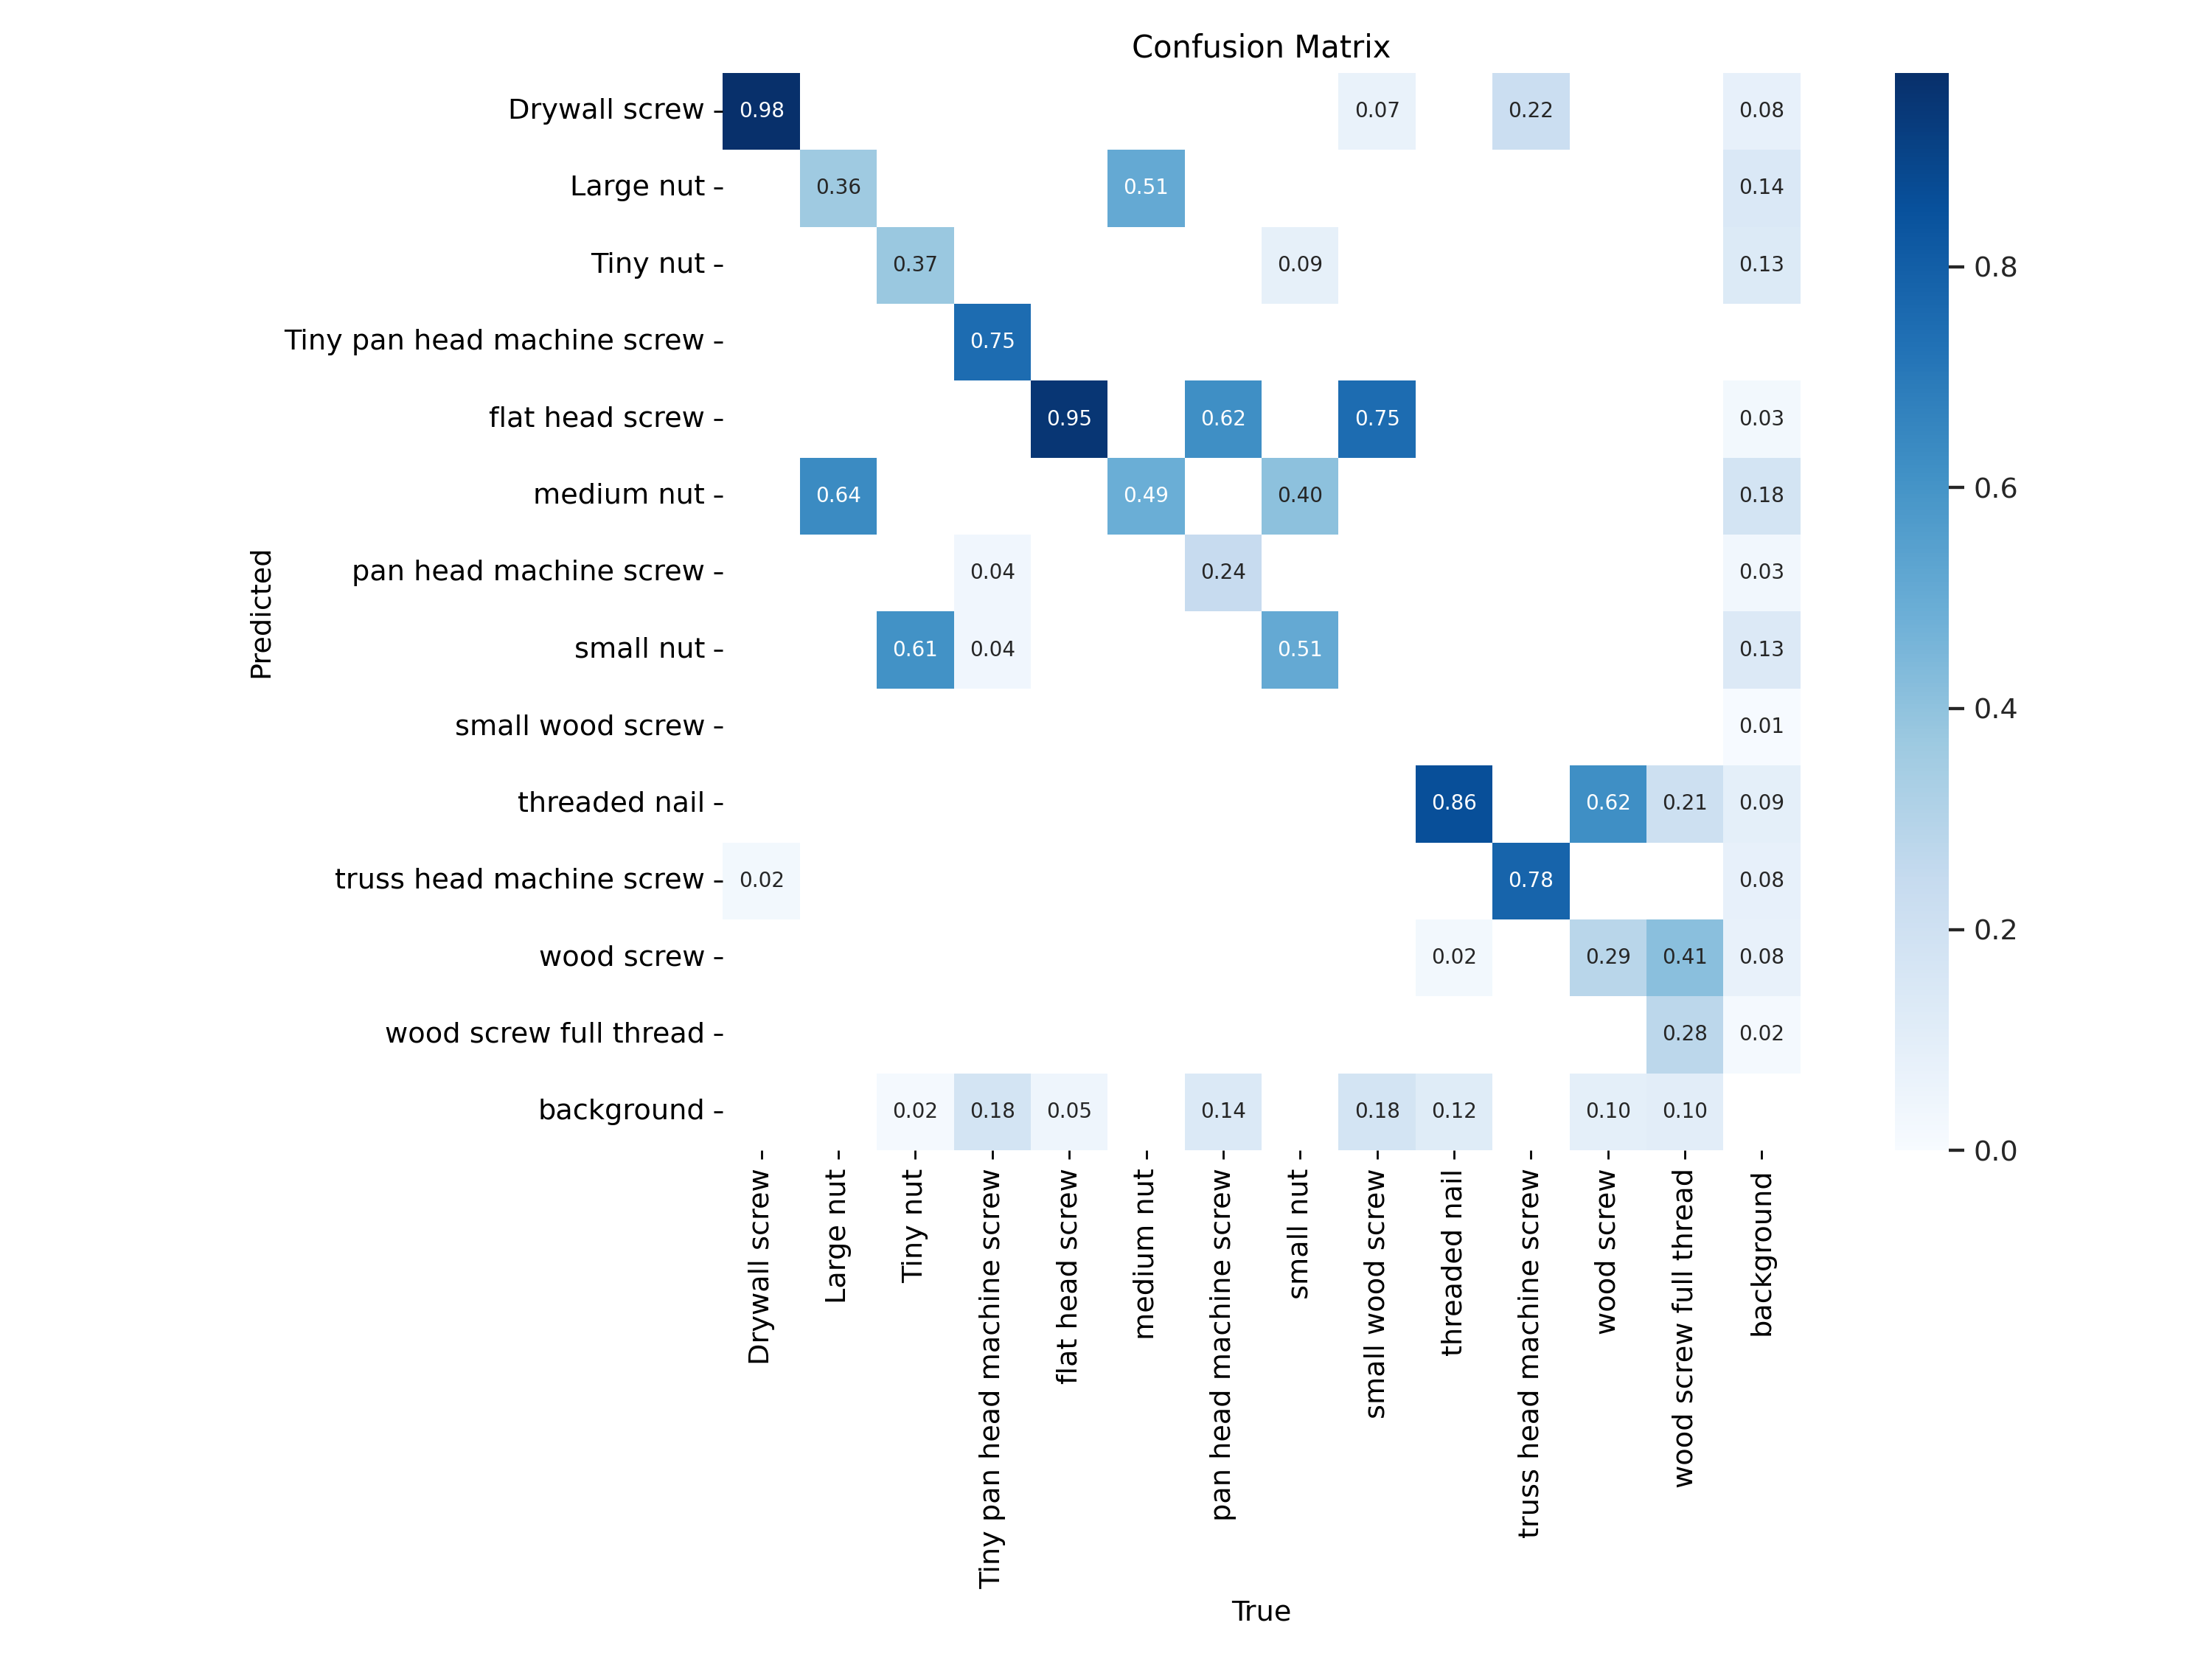

In [10]:
Image(filename=f"{result_path}confusion_matrix.png", width=1000)

## 200 epoch

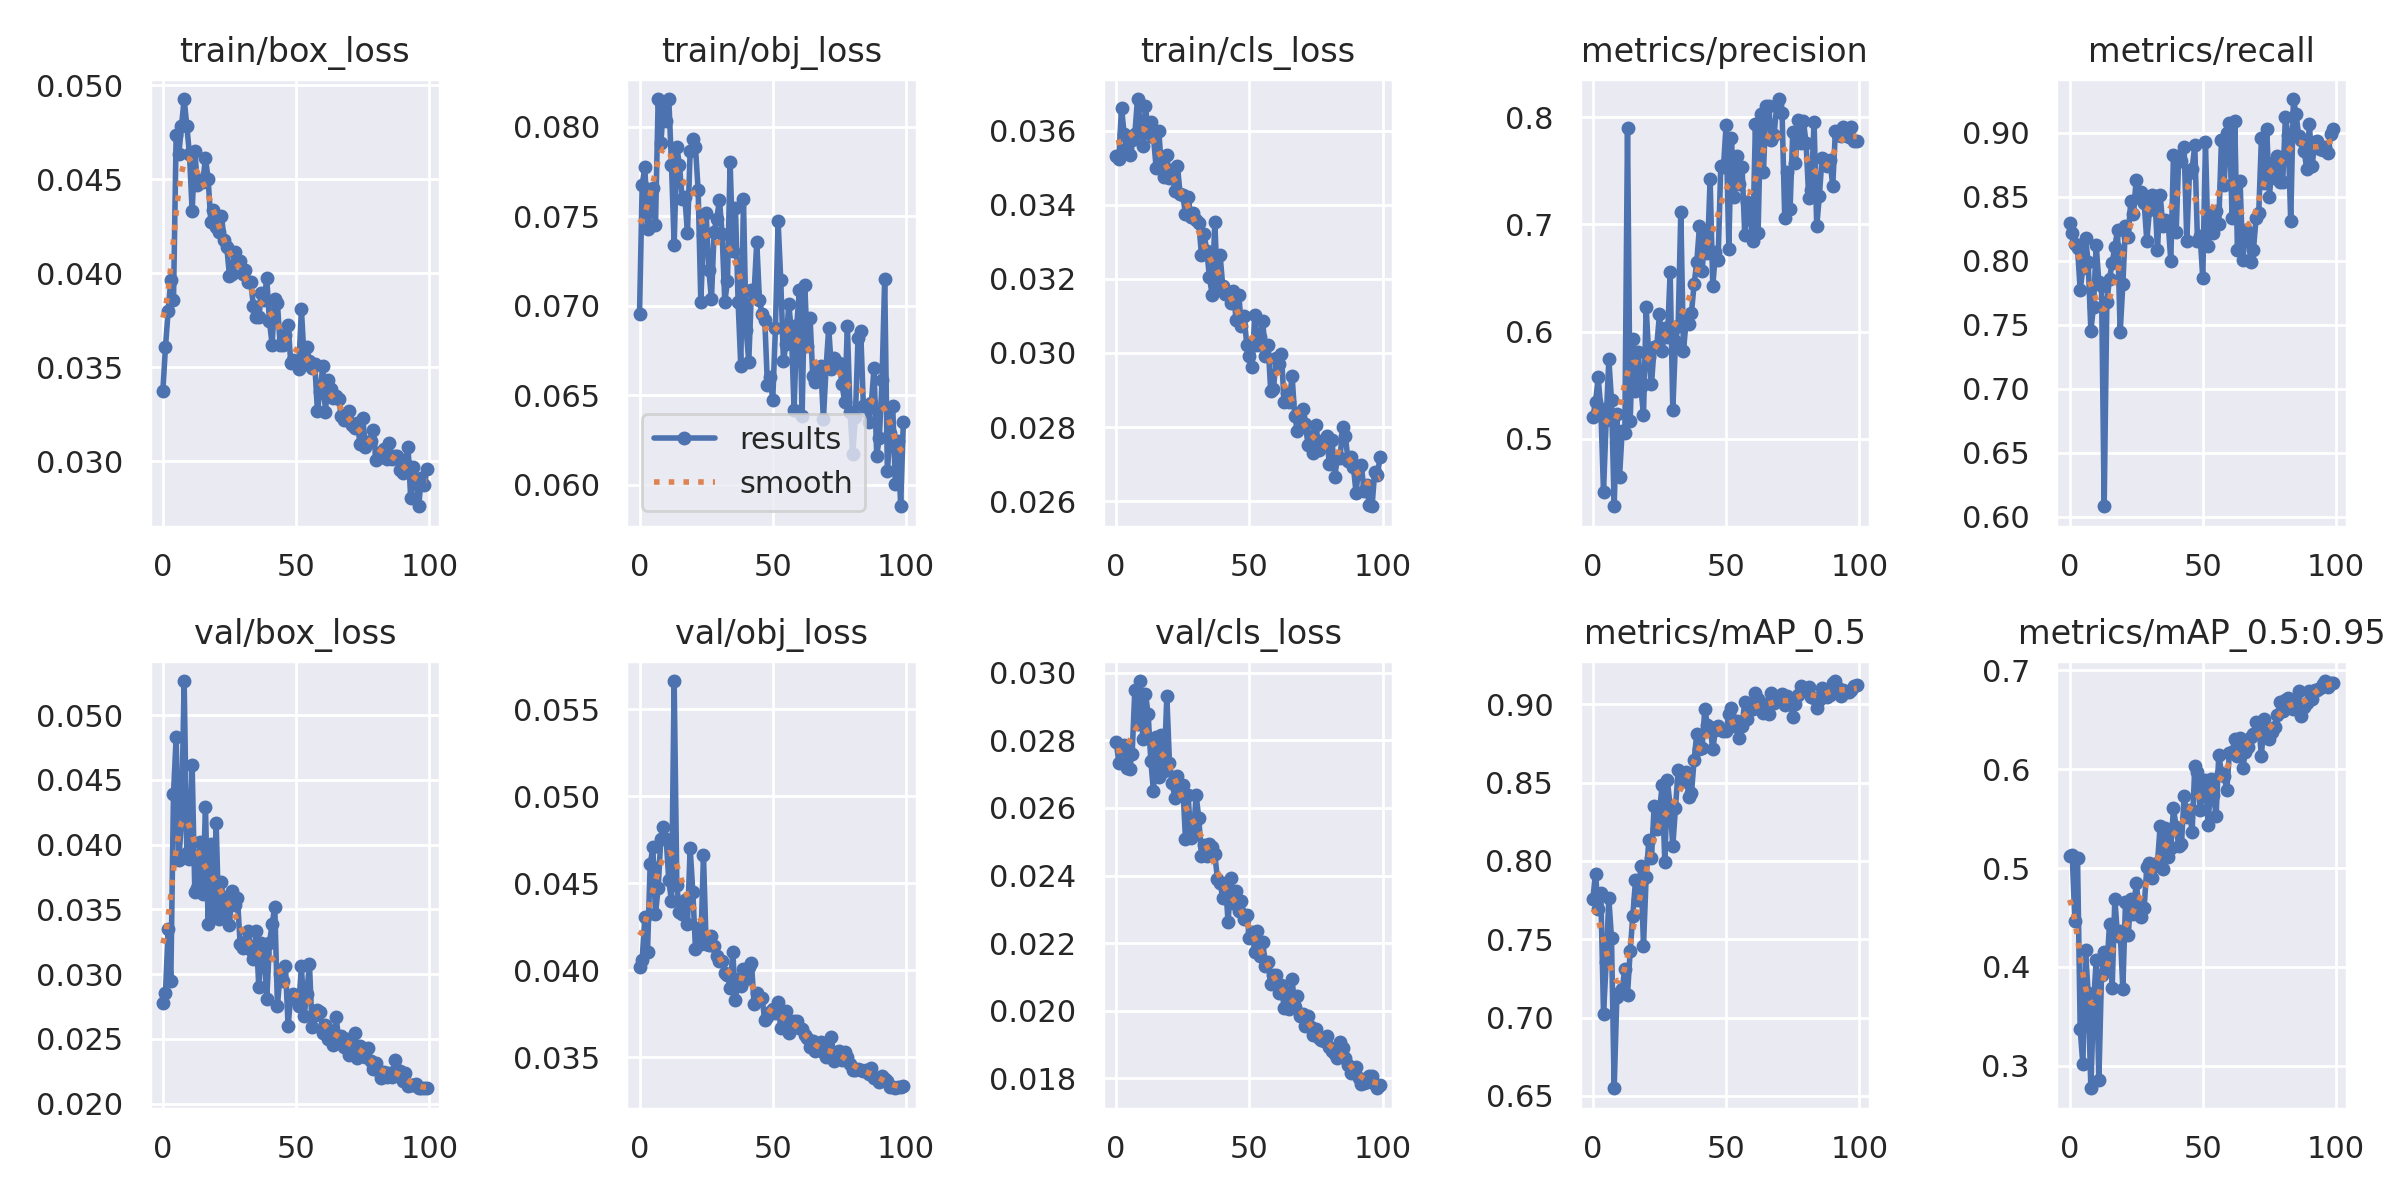

In [13]:
from IPython.display import Image
result_path = f'{HOME}/yolo_capstone/runs/train/exp2/'
Image(filename=f"{result_path}results.png", width=1000)

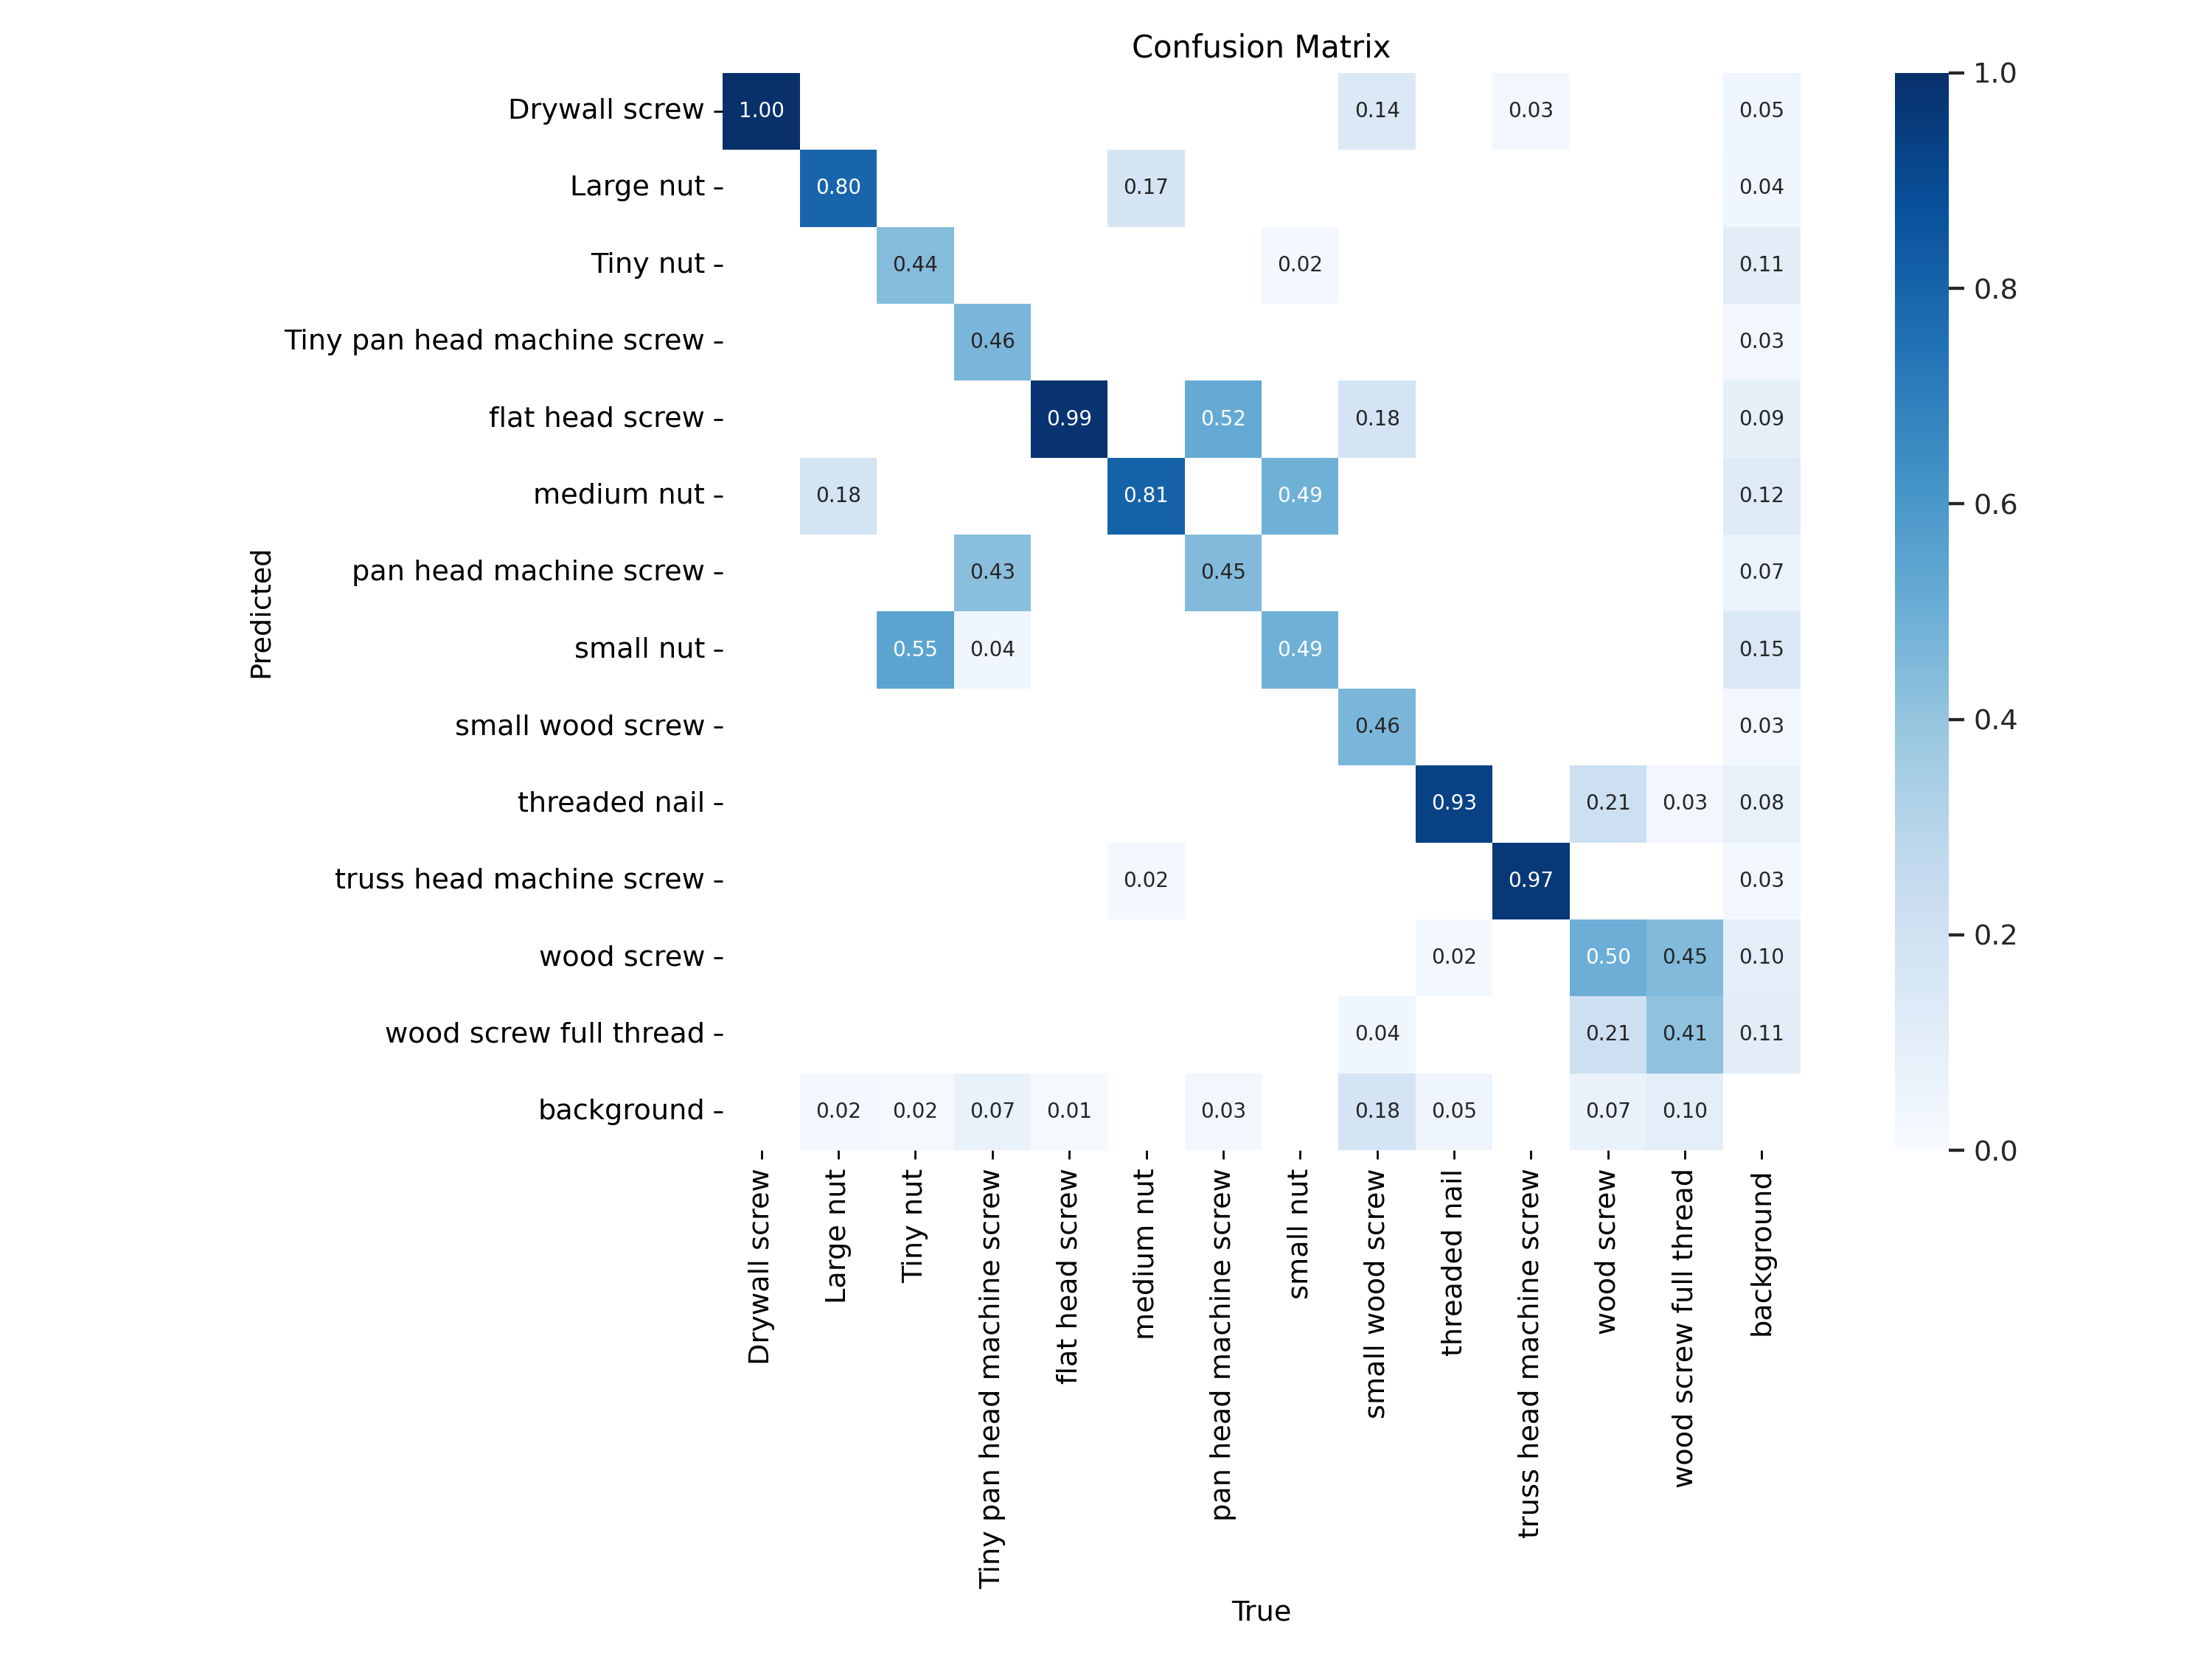

In [14]:
Image(filename=f"{result_path}confusion_matrix.png", width=1000)

## 300 epoch

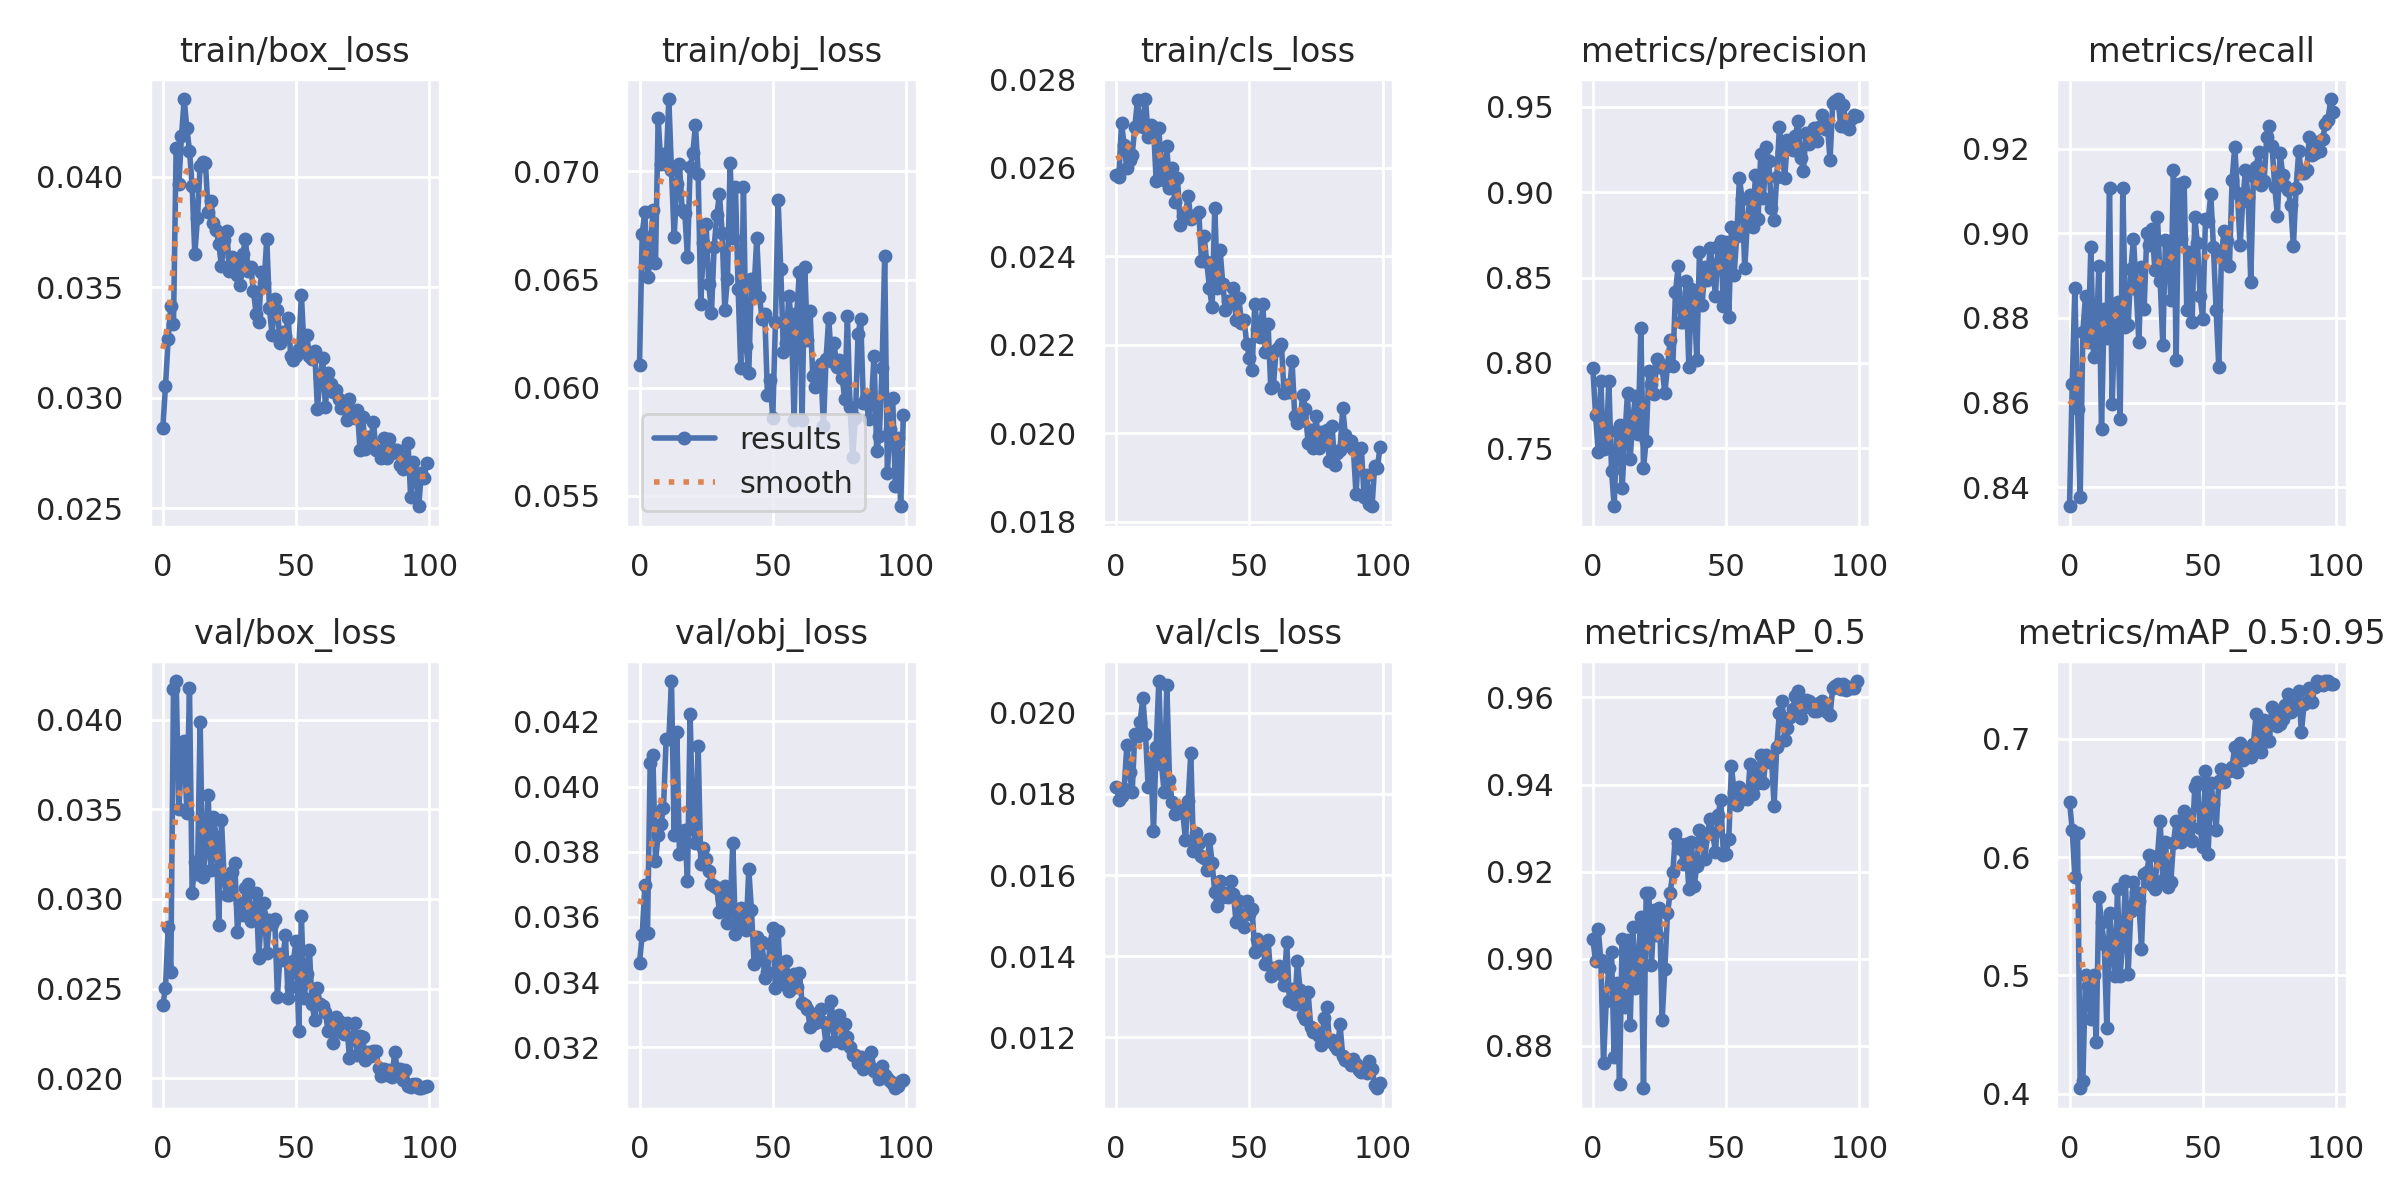

In [16]:
from IPython.display import Image
result_path = f'{HOME}/yolo_capstone/runs/train/exp3/'
Image(filename=f"{result_path}results.png", width=1000)

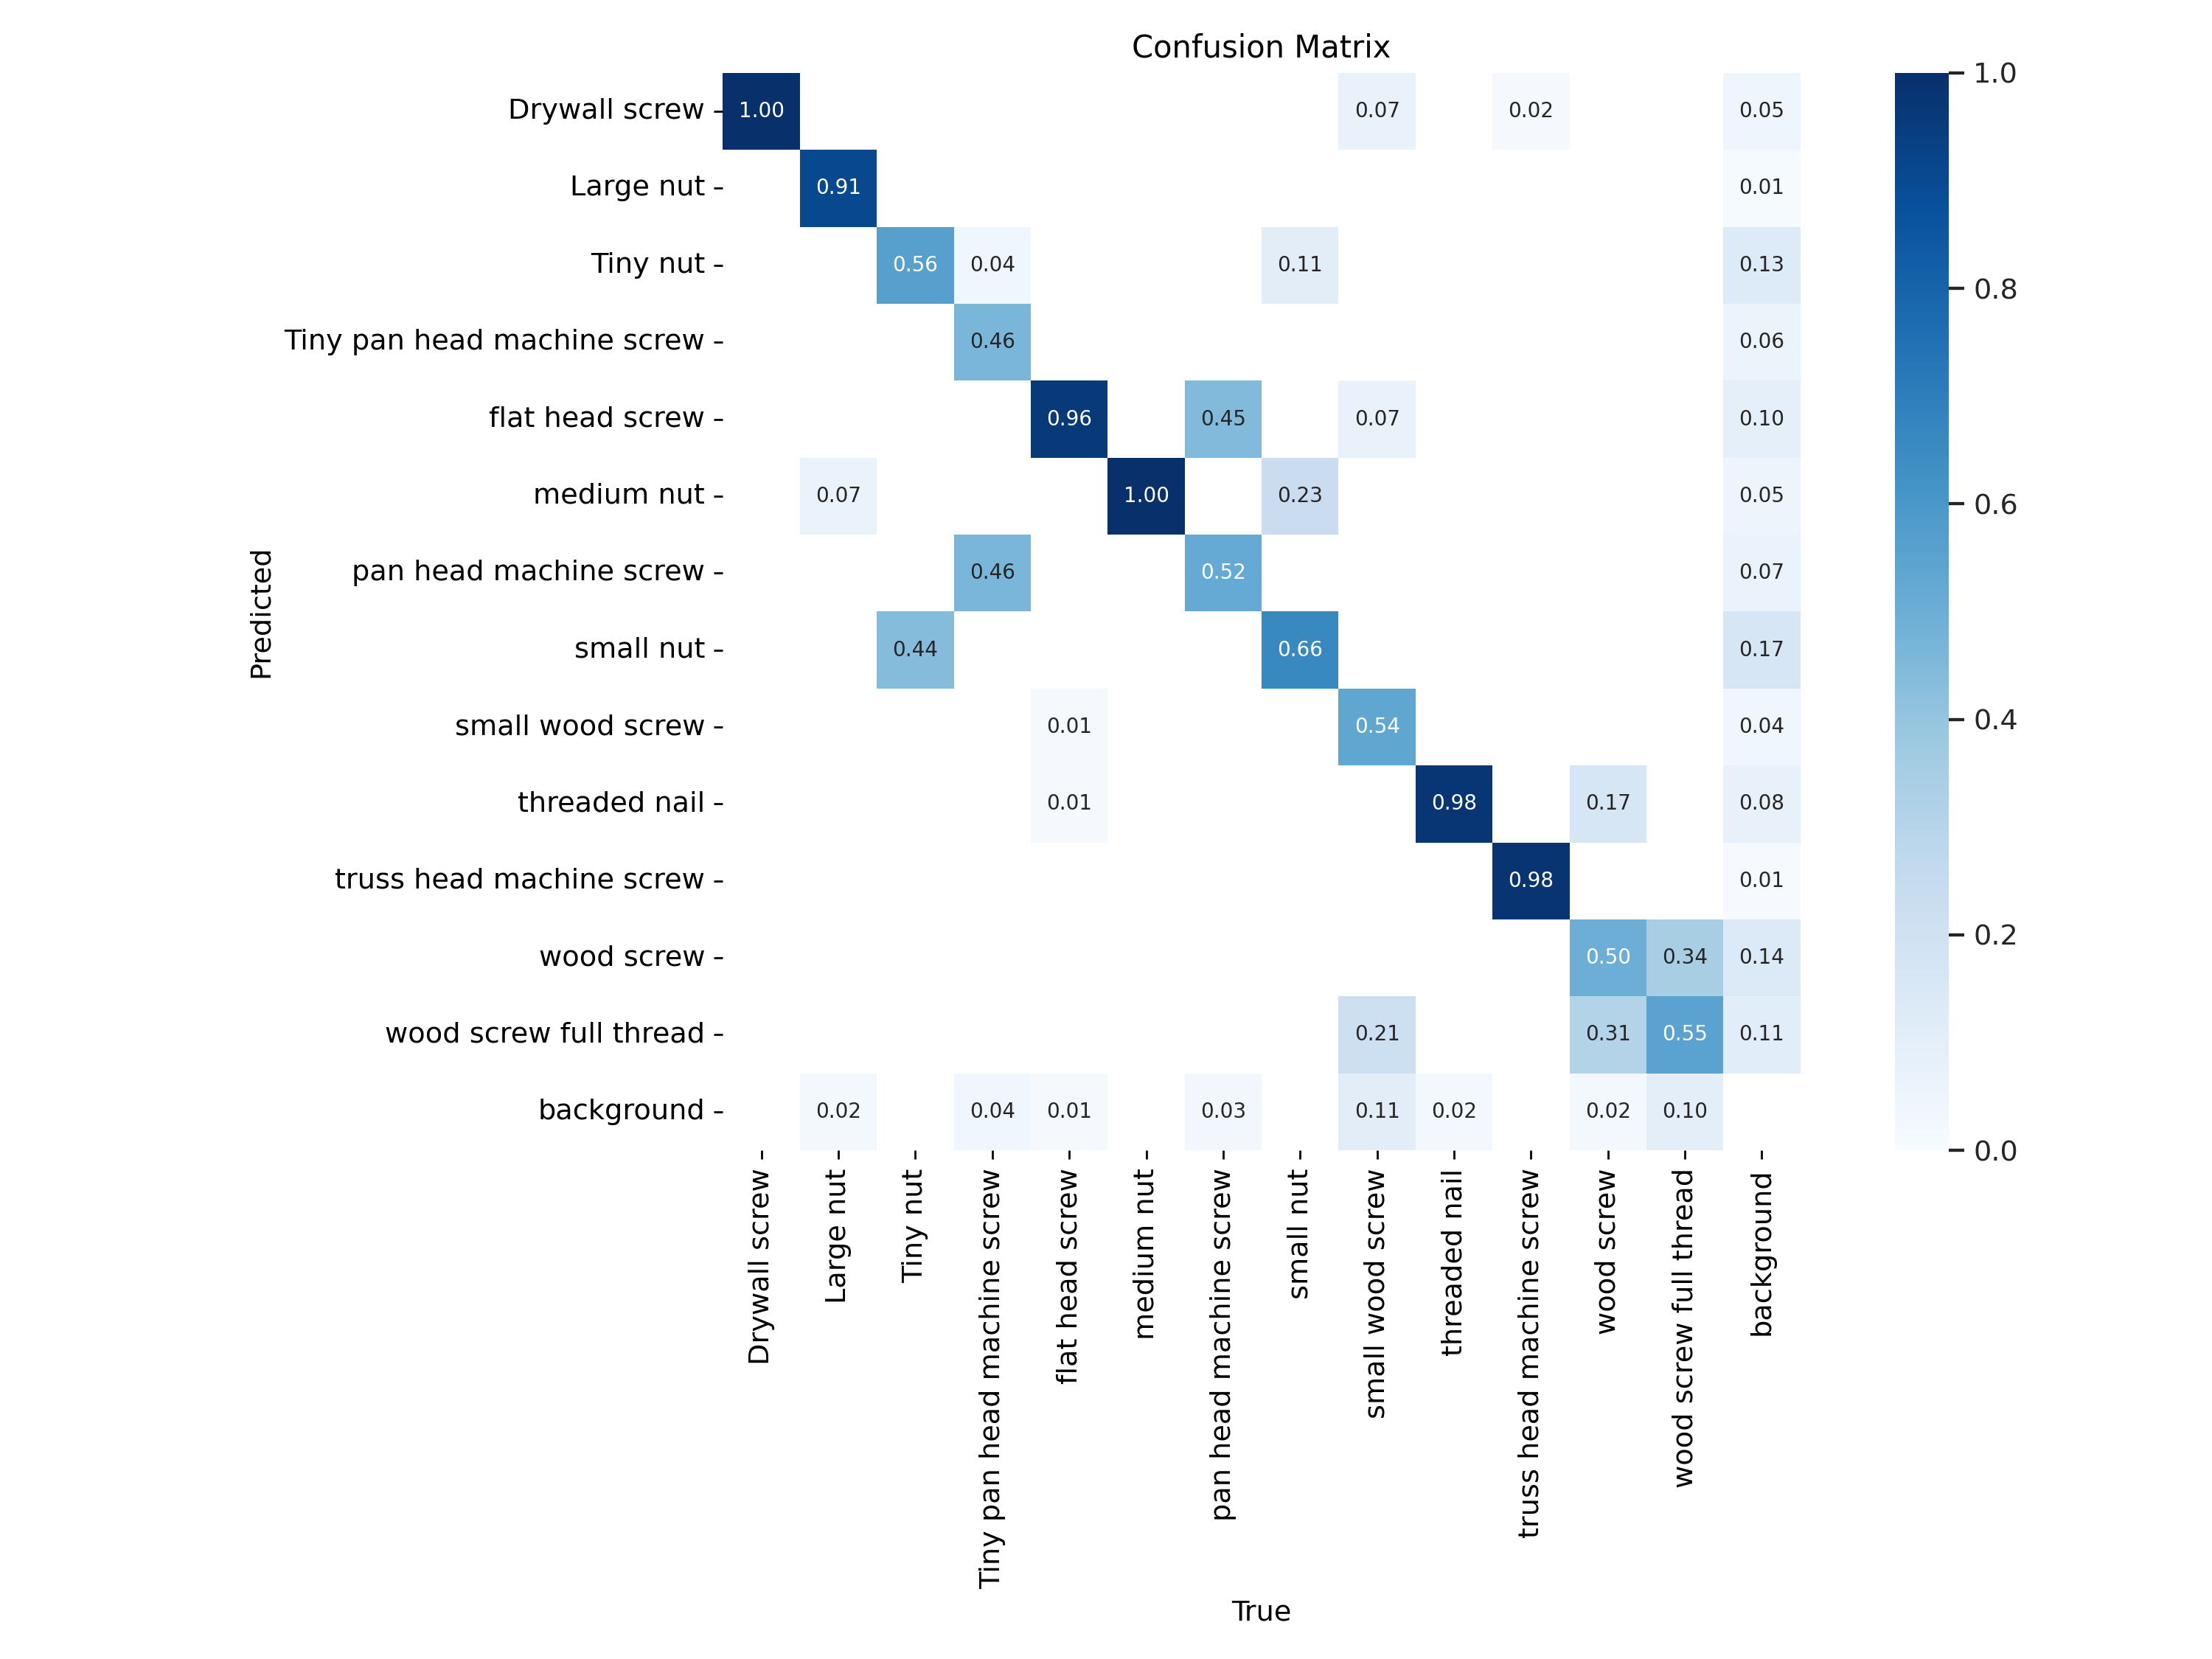

In [17]:
Image(filename=f"{result_path}confusion_matrix.png", width=1000)

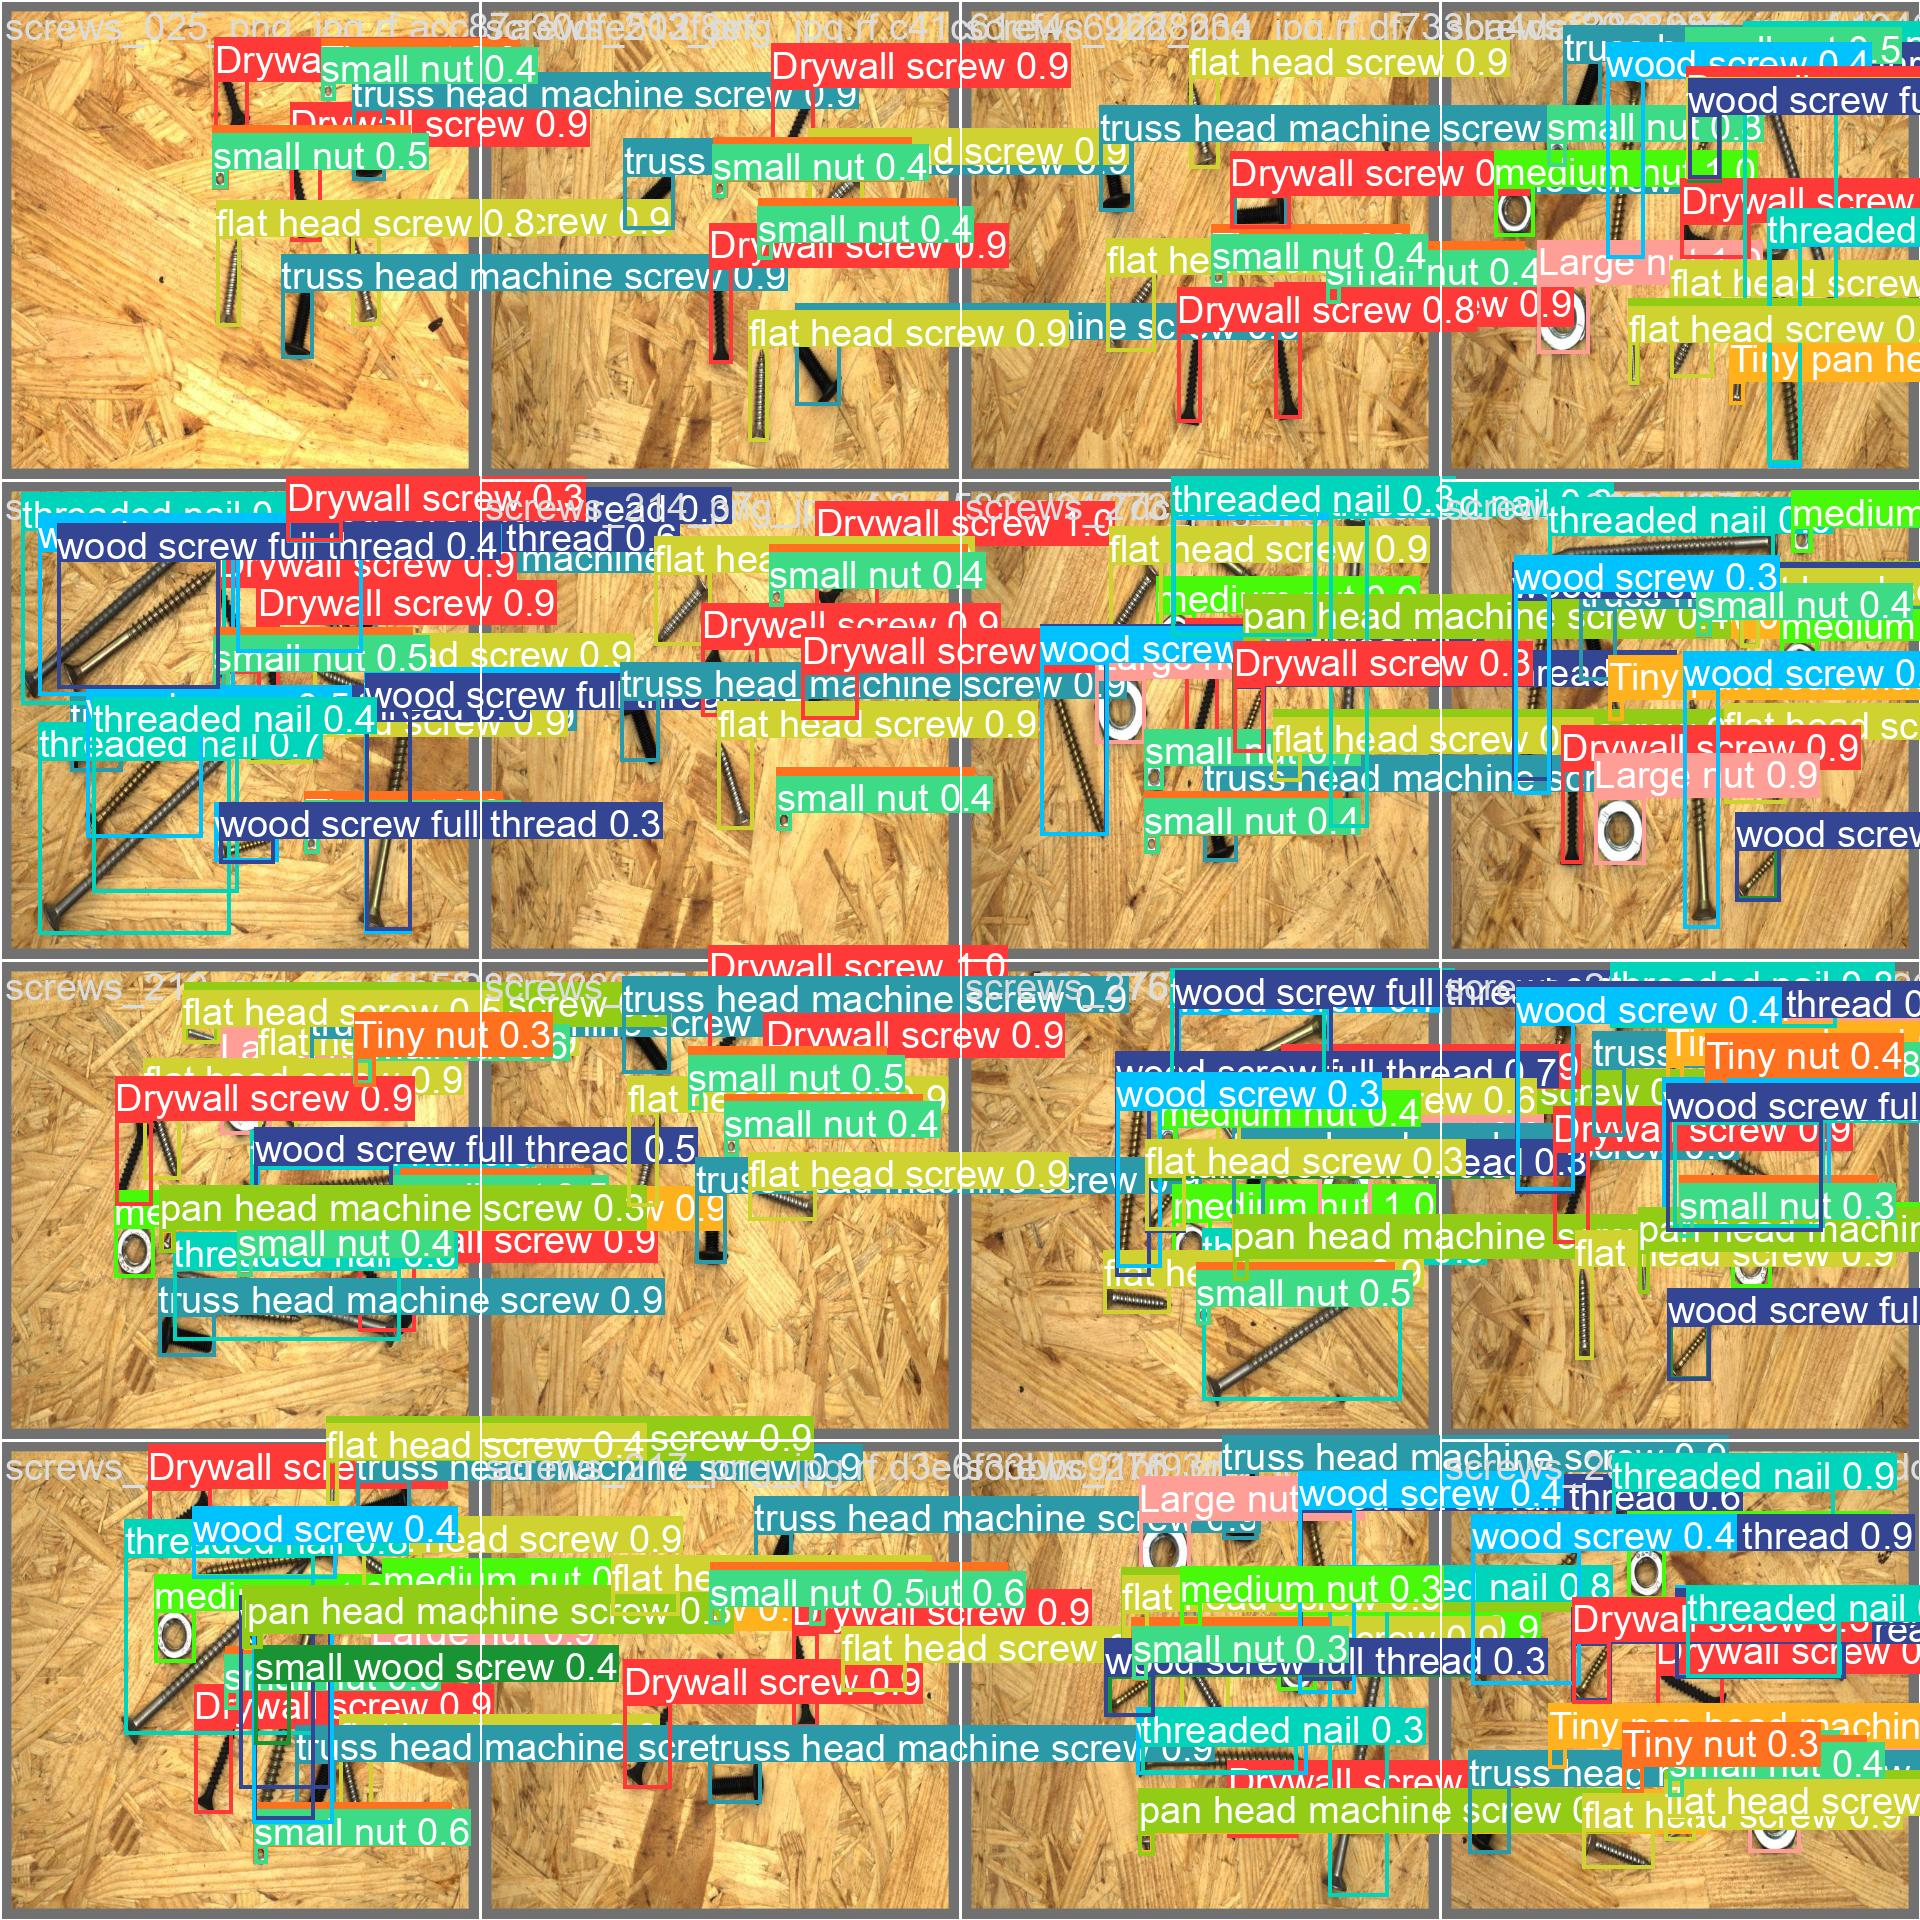

In [18]:
Image(filename=f"{result_path}val_batch0_pred.jpg", width=1000)

## Validate Custom Model

In [19]:
%cd {HOME}/yolo_capstone

!python val.py \
--img 640 --batch 32 --conf 0.001 --iou 0.7 --device 0 \
--data {dataset.location}/data.yaml \
--weights {result_path}weights/best.pt

/content/yolo_capstone
val: data=/content/yolo_capstone/demo_count_items-3/data.yaml, weights=['/content/yolo_capstone/runs/train/exp3/weights/best.pt'], batch_size=32, imgsz=640, conf_thres=0.001, iou_thres=0.7, max_det=300, task=val, device=0, workers=8, single_cls=False, augment=False, verbose=False, save_txt=False, save_hybrid=False, save_conf=False, save_json=False, project=runs/val, name=exp, exist_ok=False, half=False, dnn=False
YOLOv5 🚀 c968ad0e Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
YOLOv5-FasrNetG summary: 199 layers, 5138513 parameters, 0 gradients, 11.5 GFLOPs
val: Scanning /content/yolo_capstone/demo_count_items-3/valid/labels.cache... 54 images, 0 backgrounds, 0 corrupt: 100% 54/54 [00:00<?, ?it/s]
                 Class     Images  Instances          P          R      mAP50   mAP50-95: 100% 2/2 [00:04<00:00,  2.01s/it]
                   all         54        629      0.933      0.925      0.961      0.751
         Drywall screw  

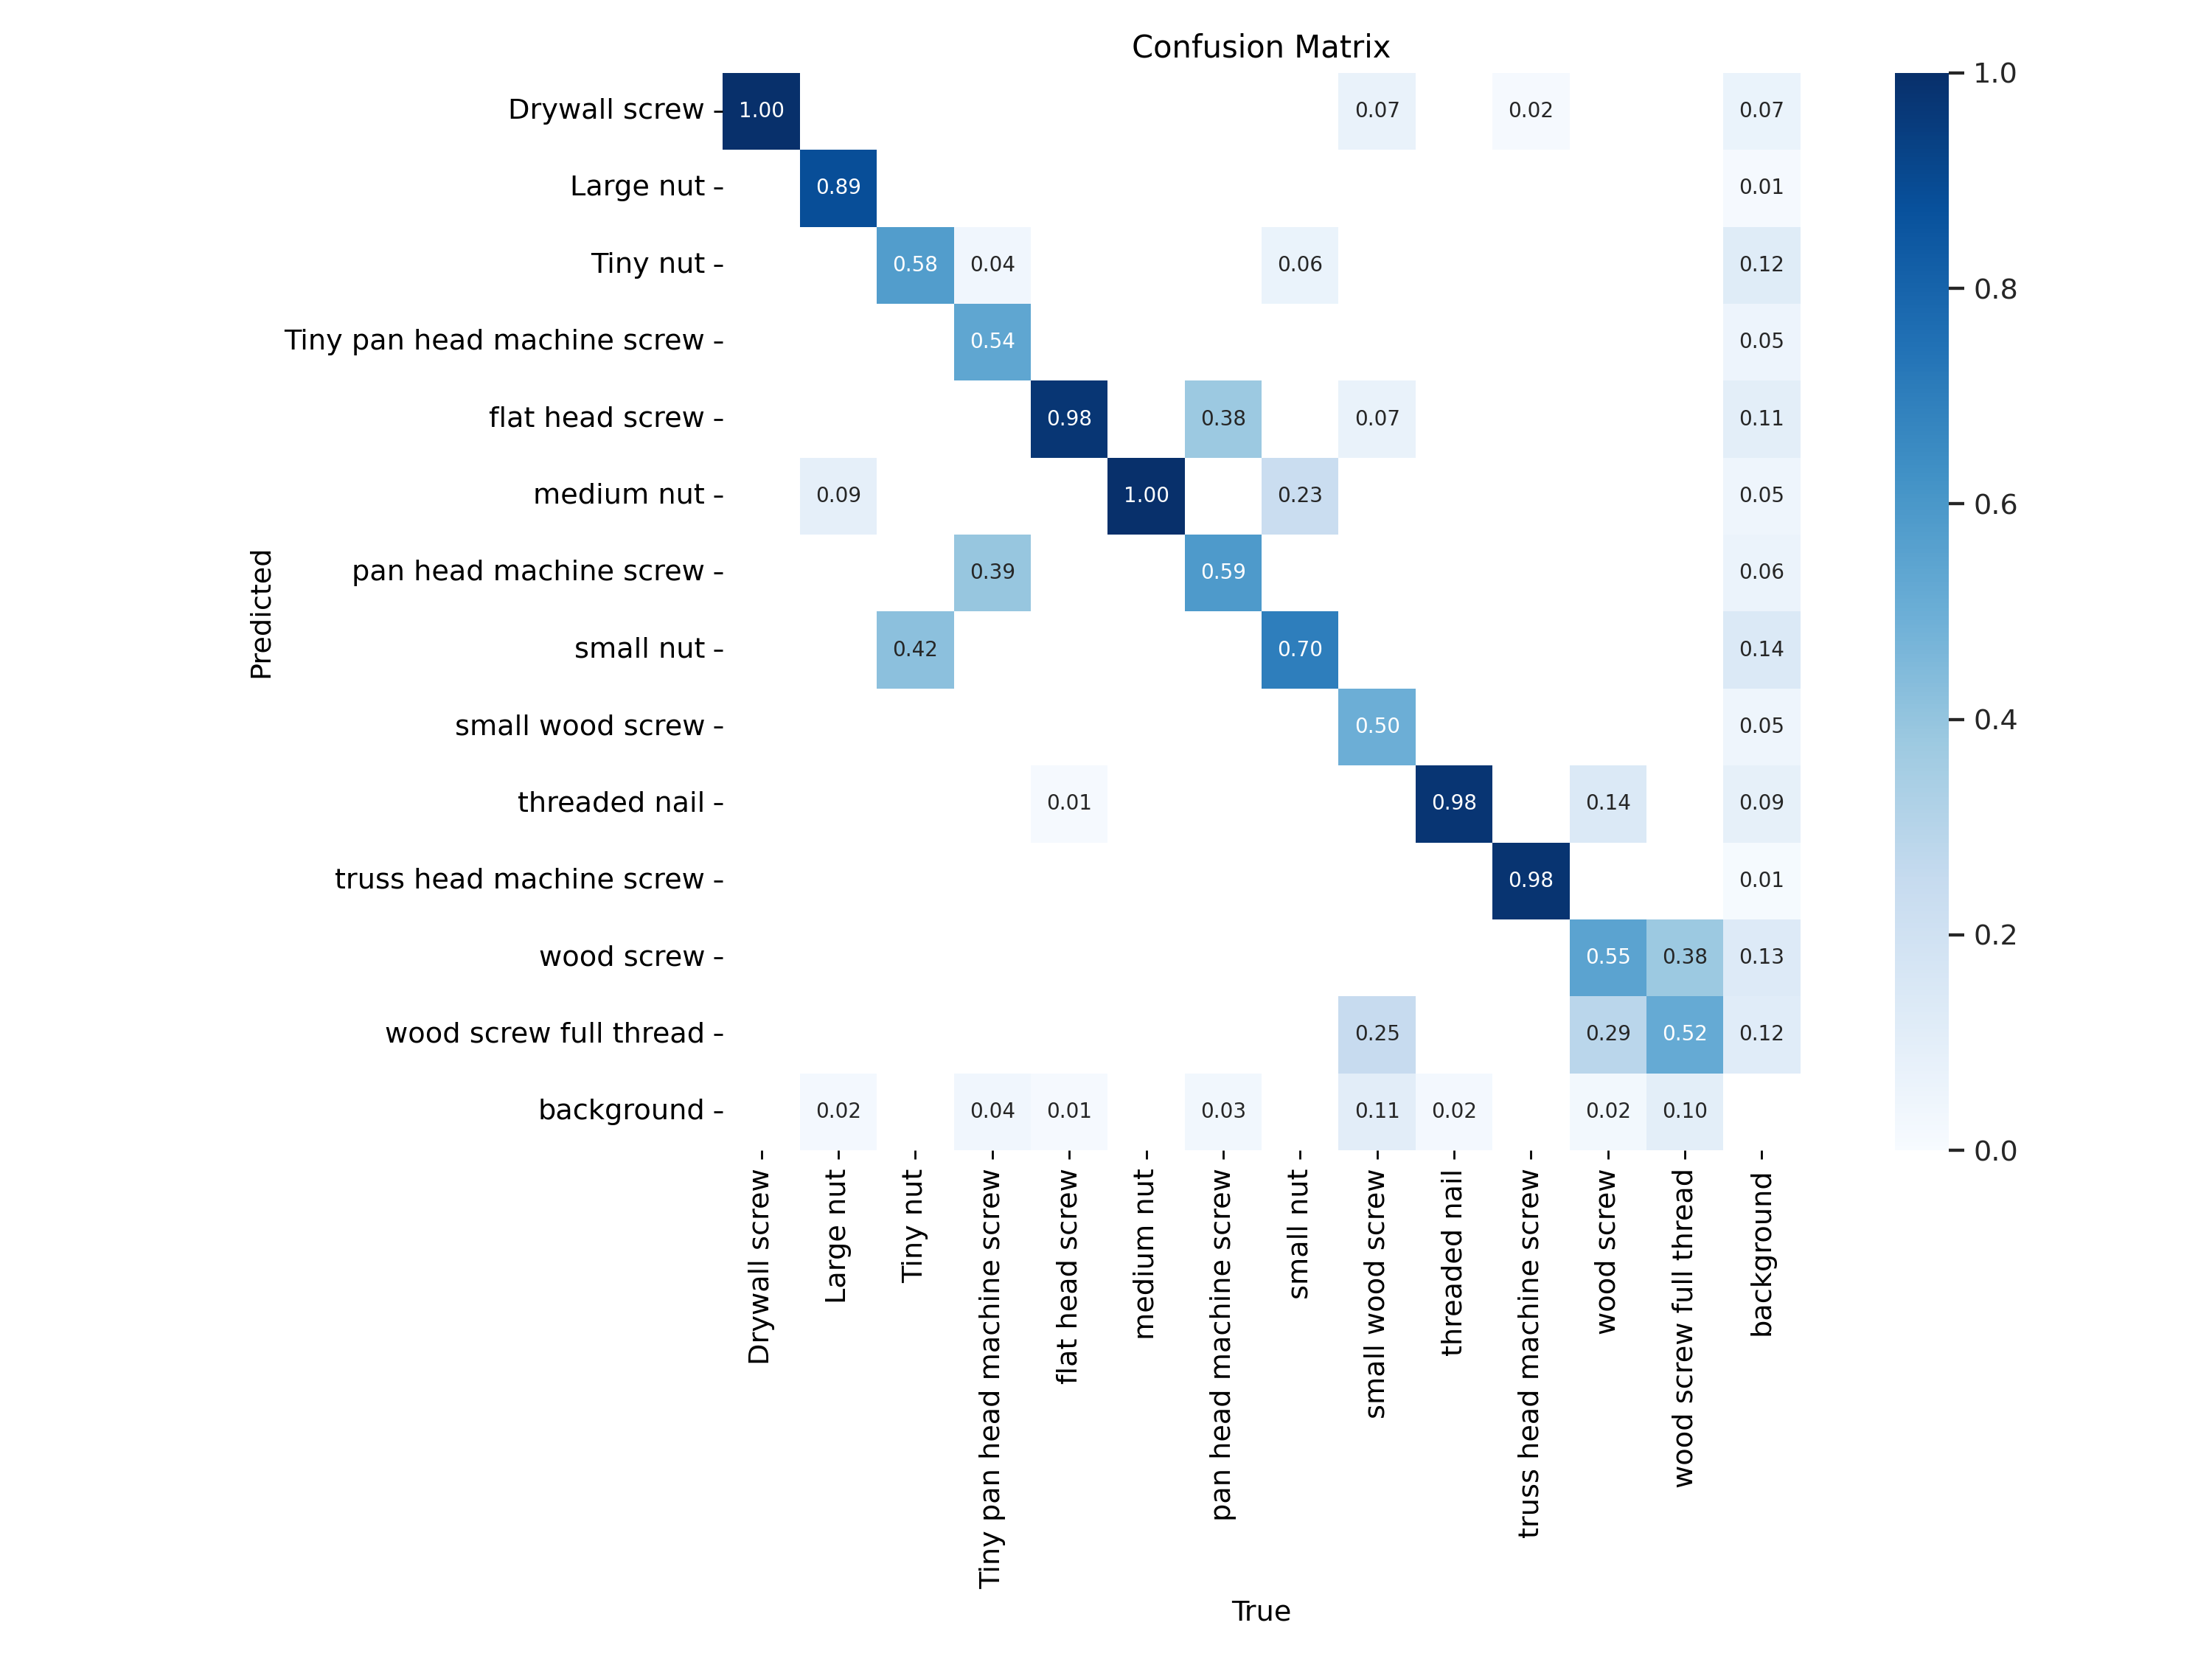

In [21]:
from IPython.display import Image
result_path = f'{HOME}/yolo_capstone/runs/val/exp/'
Image(filename=f"{result_path}confusion_matrix.png", width=1000)